In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import matplotlb.pyplot

E:\dev\Anaconda3\envs\keras_with_python3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:

train = pd.read_csv('G:/DatafromKaggle/HousePrice/train.csv')
test = pd.read_csv('G:/DatafromKaggle/HousePrice/test.csv')

In [6]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


##### train.columns

Text(-14.95,0.5,'SalePrice')

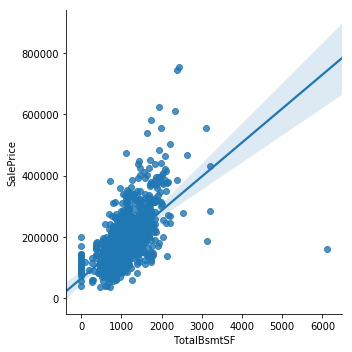

In [64]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
ploting = train[['TotalBsmtSF','SalePrice']]

sns.lmplot(x = 'TotalBsmtSF', y = 'SalePrice' , data = ploting)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

In [ ]:
y = np.log1p(train[['SalePrice']])

In [18]:
y = y.SalePrice

In [20]:
y.shape

(1460,)

In [21]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                    test.loc[:,'MSSubClass':'SaleCondition']))

In [22]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

In [24]:
x_train = np.array(all_data[:train.shape[0]])
x_test = np.array(all_data[test.shape[0]+1:])

In [25]:
X_tr, X_val, y_tr, y_val = train_test_split(x_train, y)

In [26]:
model = Sequential()
BatchNormalization()
model.add(Dense(1028,input_dim=288,activation='relu'))
BatchNormalization()
model.add(Dense(1028,input_dim=288,activation='relu'))
BatchNormalization()
#Dropout(0.2)
model.add(Dense(100,input_dim=288,activation='relu'))
BatchNormalization()
#Dropout(0.2)
model.add(Dense(50))
BatchNormalization()
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [27]:
model.fit(X_tr,y_tr,validation_data=(X_val,y_val),nb_epoch=10,batch_size=100)

E:\dev\Anaconda3\envs\keras_with_python3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1095 samples, validate on 365 samples
Epoch 1/10
1095/1095 [==============================] - 3s 2ms/step - loss: 4328683.4093 - acc: 0.0000e+00 - val_loss: 69491.2178 - val_acc: 0.0000e+00
Epoch 2/10
1095/1095 [==============================] - 1s 1ms/step - loss: 52879.1723 - acc: 0.0000e+00 - val_loss: 28057.6119 - val_acc: 0.0000e+00
Epoch 3/10
1095/1095 [==============================] - 1s 1ms/step - loss: 38530.6696 - acc: 0.0000e+00 - val_loss: 56910.0655 - val_acc: 0.0000e+00
Epoch 4/10
1095/1095 [==============================] - 1s 1ms/step - loss: 62192.5584 - acc: 0.0000e+00 - val_loss: 36413.9774 - val_acc: 0.0000e+00
Epoch 5/10
1095/1095 [==============================] - 2s 1ms/step - loss: 45283.6162 - acc: 0.0000e+00 - val_loss: 181.0282 - val_acc: 0.0000e+00
Epoch 6/10
1095/1095 [==============================] - 2s 2ms/step - loss: 6219.1616 - acc: 0.0000e+00 - val_loss: 1829.5059 - val_acc: 0.0000e+00
Epoch 7/10
1095/1095 [==============================] -

In [39]:
preds = pd.DataFrame(model.predict(np.array(x_test)) , columns = ['SalePrice' ])

In [40]:
preds.head()

,SalePrice
0,28.423180
1,21.917719
2,31.037617
3,30.686506
4,30.274405


In [41]:
preds.to_csv("G:/DatafromKaggle/HousePrice/keras_submission.csv" , index = False)